In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + np.dot(alpha,d)
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    #H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[1]], [z[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.001
    r1=[]
    r1.append(x[0][0])
    r1.append(x[1][0])
    
    r2=[]
    r2.append(d[0][0])
    r2.append(d[1][0])
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(r1, xa, r2, D, H, i, psi0)
    fxb = foS(r1, xb, r2, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(r1, xa, r2, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(r1, xb, r2, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.001
    gradiente = np.zeros((len(x), 1))
    
    t = []
    t.append(x[0][0])
    t.append(x[1][0])
    
    for i in range(len(x)):
        xh = t.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(t, D, H, i, psi0))/h
        gradiente[i][0] = dx
    return gradiente

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    n = len(x)
    Q = np.zeros((2,2))

    beta_1 = 1/(n+1)
    beta_2 = n**2/(n**2-1)
    beta_3 = 2/(n+1)

    Q = [[25., 0.],[0., 25.]]
    
    grad = gradiente(x, D, H, i, psi0)
    gamma = 0.5
    
    eps = 0.000001
    errox = eps + 1
    xant = x.copy()
    
    k = 1
    kmax = 20
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        
        xant = x.copy()
        
        m = gradiente(x, D, H, i, psi0)
        x = x - beta_1*(np.matmul(Q, m))/(np.matmul(np.matmul(m.T,Q),m))**(1/2)
        Q = beta_2*(Q - beta_3*np.matmul((np.matmul(Q,m)),(np.matmul(Q,m)).T)/(np.matmul(np.matmul(m.T,Q),m)))
        k=k+1
        
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
a = random.uniform(-5., 5.)
x = np.array([[a],[a]]) #Ponto fora da bacia de atração

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    a = resultado[1][0]
    x = np.array([[a[0]],[a[0]]]) #Ponto fora da bacia de atração
    
    u = [[0, a[0]],[a[0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.8000720872557786-0.005223068265602118j)], [(0.5995966048279348-0.018473933172311902j)]]
iteracao:  2
[[(0.8007097774543885+0.003375026407836784j)], [(0.5987593038313903-0.018432512834445372j)]]
iteracao:  3
[[(0.8008422784090597-0.006174520952085659j)], [(0.5973289320776268-0.04256368449847477j)]]
iteracao:  4
[[(0.8023547910475777+0.0030833345345023947j)], [(0.595408675489717-0.04130122766004284j)]]
iteracao:  5
[[(0.804186587884918+0.01711454734588792j)], [(0.5931971360910578-0.03328936445797491j)]]
iteracao:  6
[[(0.8056004132584548+0.02331373823071585j)], [(0.5909303840106622-0.035577028100502076j)]]
iteracao:  7
[[(0.8060959906519608+0.013232679510187285j)], [(0.5886015939170866-0.0598524314995478j)]]
iteracao:  8
[[(0.8078928512194963+0.015058051457609889j)], [(0.5852486545791455-0.06757520406638705j)]]
iteracao:  9
[[(0.8106146147863329+0.023510807725244012j)], [(0.5814070207948896-0.06570436995191947j)]]
iteracao:  10
[[(0.811785629262954+0.017357619913102453j

[[(0.8553176328544069-0.11478196492661852j)], [(0.5018401137196588+0.05842383599160338j)]]
iteracao:  81
[[(0.8516785013936113-0.11253336855350558j)], [(0.5081816702231599+0.06108484390430987j)]]
iteracao:  82
[[(0.848538056650101-0.11408567932942237j)], [(0.5135745807759863+0.05664601522088681j)]]
iteracao:  83
[[(0.8448387089902603-0.11027992507711676j)], [(0.5200459709915791+0.06031648884381605j)]]
iteracao:  84
[[(0.8424450509266809-0.11756616086406495j)], [(0.5238387546900279+0.04535956252992773j)]]
iteracao:  85
[[(0.8381484554043855-0.10548146436393042j)], [(0.5316861160558708+0.06075111640043515j)]]
iteracao:  86
[[(0.8331717609164584-0.09199113165704907j)], [(0.5398423029159455+0.07702423762397204j)]]
iteracao:  87
[[(0.8283554115436389-0.08211873014300858j)], [(0.5473682763585592+0.0864395338588313j)]]
iteracao:  88
[[(0.8248227726452088-0.08041263045470863j)], [(0.5535208831991647+0.08255804678358819j)]]
iteracao:  89
[[(0.8234190837183062-0.09302799528535978j)], [(0.5568585

[[(0.9235658980621998-0.033607552311738544j)], [(0.3813458993774914-0.02172243728484623j)]]
iteracao:  161
[[(0.923537623022869-0.034871155179616926j)], [(0.3818427254566549-0.007641286024614075j)]]
iteracao:  162
[[(0.9230549367710654-0.038161053895208026j)], [(0.3827679005150635+0.0014306711499408025j)]]
iteracao:  163
[[(0.921949538905149-0.03621065240292179j)], [(0.38493466948443317+0.02287206319893969j)]]
iteracao:  164
[[(0.9202567158882543-0.03654574463479647j)], [(0.38771014819854344+0.038377350234235406j)]]
iteracao:  165
[[(0.9198494892561018-0.056546603094657824j)], [(0.3881124556450723+0.006936500546457919j)]]
iteracao:  166
[[(0.9187044606404114-0.06153211558013927j)], [(0.38996931378902905+0.010947215179667208j)]]
iteracao:  167
[[(0.9175352266115263-0.06991246944167738j)], [(0.3914026108574551+0.006733886149796973j)]]
iteracao:  168
[[(0.9159425918566116-0.07033502569943384j)], [(0.39454802091618735+0.020832815119610278j)]]
iteracao:  169
[[(0.9133209582074098-0.06606099

[[(0.8898845593507991+0.05297863499865232j)], [(0.4423351881586854-0.09817489091670811j)]]
iteracao:  247
[[(0.8926131904860743+0.04750953488796344j)], [(0.4366516764540234-0.1015866247909183j)]]
iteracao:  248
[[(0.8965717684723891+0.04779648506645383j)], [(0.4305018129789909-0.09242695279983687j)]]
iteracao:  249
[[(0.8989873224176391+0.04146617481789719j)], [(0.42524340866220944-0.0962828460924608j)]]
iteracao:  250
[[(0.9026501303841036+0.04123540849267694j)], [(0.41957177533848394-0.08649798317291384j)]]
iteracao:  251
[[(0.9047470822071914+0.03411967948776927j)], [(0.41475320975466595-0.09082032951682141j)]]
iteracao:  252
[[(0.9084151055590094+0.03526444899123455j)], [(0.40951584810377106-0.0763883319895249j)]]
iteracao:  253
[[(0.911665043746075+0.037006886960490384j)], [(0.4048831924177993-0.05972379114126604j)]]
iteracao:  254
[[(0.9140147640614356+0.03585640981702164j)], [(0.40113150798477-0.04883476858175382j)]]
iteracao:  255
[[(0.9157513602852121+0.031861761783729334j)], 

[[(0.8033594784043671+0.014101037627795961j)], [(0.5937352425742309-0.04351043973278932j)]]
iteracao:  327
[[(0.8045977467271084+0.013761316078454093j)], [(0.5911302567804663-0.054754900134389904j)]]
iteracao:  328
[[(0.8064375343159884+0.017459030978010708j)], [(0.5879877330968036-0.06020048693654481j)]]
iteracao:  329
[[(0.8094308801855523+0.03252884061325188j)], [(0.5842157762909037-0.0495523850551272j)]]
iteracao:  330
[[(0.8118197773893757+0.04167493016687039j)], [(0.5805561501208424-0.04654452904143867j)]]
iteracao:  331
[[(0.81383837714048+0.04470089779528033j)], [(0.5770631030094279-0.05164385883500023j)]]
iteracao:  332
[[(0.814960021256525+0.03640396714610315j)], [(0.5738228861712175-0.07240302195729942j)]]
iteracao:  333
[[(0.81759704754385+0.03920604867741154j)], [(0.5692671648300344-0.07702490494300977j)]]
iteracao:  334
[[(0.8194800115027883+0.03511013709201314j)], [(0.564730617719471-0.09109942784514355j)]]
iteracao:  335
[[(0.8228775721170135+0.03942685416260971j)], [(0

[[(0.816776434624976-0.08234695961317805j)], [(0.569224418048645+0.045593650759130515j)]]
iteracao:  414
[[(0.8147520684773806-0.08488575580714502j)], [(0.5725906029229838+0.03336857519557715j)]]
iteracao:  415
[[(0.8125419971231634-0.08116485030936747j)], [(0.576461570837384+0.029661630361600036j)]]
iteracao:  416
[[(0.8103776748961692-0.07532040719776602j)], [(0.5803477427578577+0.028484078669063544j)]]
iteracao:  417
[[(0.8079924512263869-0.06410273944412029j)], [(0.5846918009052642+0.03427127764350852j)]]
iteracao:  418
[[(0.8054484234875825-0.051430765284452146j)], [(0.5889728786361418+0.041456563552120004j)]]
iteracao:  419
[[(0.8033913200265567-0.04510743635212408j)], [(0.592429309266585+0.03943608181242693j)]]
iteracao:  420
[[(0.8025254181542235-0.056140149943462524j)], [(0.5938145430802744+0.013620209210624443j)]]
iteracao:  421
[[(0.8012577986125021-0.04863184080256039j)], [(0.5962048921058885+0.012672637223410006j)]]
iteracao:  422
[[(0.8000206231229636-0.03784586566407956j

[[(0.900476121150689-0.07380345426751042j)], [(0.42426368616544163+0.06079566676092999j)]]
iteracao:  494
[[(0.8982773688060979-0.08073666577336723j)], [(0.4283179410638247+0.05588455932085657j)]]
iteracao:  495
[[(0.8955242425041211-0.0838306412071674j)], [(0.43311469775900924+0.058484154909997j)]]
iteracao:  496
[[(0.8922968369208031-0.08447565203398533j)], [(0.4386228567422718+0.06542317376165957j)]]
iteracao:  497
[[(0.8904519894119997-0.0952064909077188j)], [(0.44204089279219516+0.051291430243947195j)]]
iteracao:  498
[[(0.8878451860891328-0.0996784791643939j)], [(0.44649619595909407+0.04935844806572521j)]]
iteracao:  499
[[(0.8846917897196742-0.09997195102704842j)], [(0.4519873043510088+0.055077272724007115j)]]
iteracao:  500
[[(0.8806687395854323-0.09559479313492474j)], [(0.45883078226558016+0.0689819025637221j)]]
iteracao:  501
[[(0.878477390085586-0.10486135772903599j)], [(0.46276479583766084+0.055949061474845095j)]]
iteracao:  502
[[(0.8753203906614918-0.10631740773202057j)],

[[(0.9208138922966695-0.014766925910879311j)], [(0.3867632112422253-0.04793648224790269j)]]
iteracao:  583
[[(0.9220682750725496-0.014839021941005786j)], [(0.385437330067267-0.03174804406881704j)]]
iteracao:  584
[[(0.922433825230971-0.021321608127623626j)], [(0.3843415635611671-0.030704458838495846j)]]
iteracao:  585
[[(0.9228466652830037-0.024455035434860196j)], [(0.3837882060896069-0.02150745542110645j)]]
iteracao:  586
[[(0.9229544278701989-0.023776618238120554j)], [(0.38416153011163273-0.0031127712701759687j)]]
iteracao:  587
[[(0.9225563720521199-0.02856330749504905j)], [(0.3847980725285461+0.002072506401713265j)]]
iteracao:  588
[[(0.9220140721858956-0.042186728264561824j)], [(0.38459673863783356-0.013987612957314814j)]]
iteracao:  589
[[(0.9215938878815175-0.04375526948389803j)], [(0.38567947185093976-0.0012252349610515374j)]]
iteracao:  590
[[(0.9203355818404042-0.03918866258447525j)], [(0.388301505635839+0.025856913796218628j)]]
iteracao:  591
[[(0.9197070277481956-0.05991534

[[(0.8592946397279768+0.06113686204345581j)], [(0.49436671716300445-0.11608844442196055j)]]
iteracao:  667
[[(0.8642629420833632+0.06495256991019153j)], [(0.48683661694531055-0.10872355174642664j)]]
iteracao:  668
[[(0.867511150366674+0.061153616187928854j)], [(0.48030988384442186-0.11396063525820344j)]]
iteracao:  669
[[(0.872099966165925+0.06299521304557273j)], [(0.4730551133178922-0.10812993838515737j)]]
iteracao:  670
[[(0.8752489788840342+0.058594612417386054j)], [(0.4666383434293706-0.11293593075753416j)]]
iteracao:  671
[[(0.8798344667977609+0.06029045844447294j)], [(0.4595034360657858-0.10541790893718803j)]]
iteracao:  672
[[(0.8828961064788732+0.0555903979678241j)], [(0.45328248939894394-0.10926632253785638j)]]
iteracao:  673
[[(0.8872520383198833+0.056532459991980866j)], [(0.4464694875213494-0.10125645542036975j)]]
iteracao:  674
[[(0.8900993458034193+0.051180801804434656j)], [(0.44056501772954243-0.10491004175570691j)]]
iteracao:  675
[[(0.8942109181646178+0.0515319283235454

[[(0.8496072397637833+0.07294825595915287j)], [(0.5168092729057642-0.07585663047542526j)]]
iteracao:  769
[[(0.8516871378859401+0.06573272001246142j)], [(0.5120733645939478-0.08993920609887265j)]]
iteracao:  770
[[(0.8550803551026125+0.06555855822576465j)], [(0.5060844168190163-0.09175068198498759j)]]
iteracao:  771
[[(0.856779556614476+0.05585074461454232j)], [(0.5008997595137247-0.10912781232883499j)]]
iteracao:  772
[[(0.8608004279791913+0.056745678935772544j)], [(0.4941598005421209-0.10774323847669198j)]]
iteracao:  773
[[(0.8643403605772292+0.05520096789008408j)], [(0.48766371681011605-0.10978459051300025j)]]
iteracao:  774
[[(0.8690386043073594+0.05900490219765384j)], [(0.48063000322182636-0.1014154253352033j)]]
iteracao:  775
[[(0.8719118152455314+0.0543979248132031j)], [(0.4746320327995843-0.10740134262132273j)]]
iteracao:  776
[[(0.876153771944067+0.05590212845410968j)], [(0.46792803658599014-0.10135499613237237j)]]
iteracao:  777
[[(0.8790573482501913+0.05136520020602346j)], 

[[(0.8023010820757394-0.014040741841597908j)], [(0.5962537851692854-0.024437895421861366j)]]
iteracao:  854
[[(0.8030813414691704-0.0019389517668655255j)], [(0.595555648004283-0.01923604349693952j)]]
iteracao:  855
[[(0.8034076777231941-0.006147864043500295j)], [(0.594312843888825-0.035923620361039243j)]]
iteracao:  856
[[(0.8044140764358996-0.0023601401265944213j)], [(0.5926019991266219-0.041656329148366075j)]]
iteracao:  857
[[(0.8060550283611271+0.00889333961561719j)], [(0.5906156463915394-0.037004239658625114j)]]
iteracao:  858
[[(0.8065700527425818+0.0016268864445512562j)], [(0.5883426114692681-0.05740235633399297j)]]
iteracao:  859
[[(0.8085114536663739+0.007739157292999847j)], [(0.5854441934745712-0.05919786124221655j)]]
iteracao:  860
[[(0.8112035069727705+0.021288278541621103j)], [(0.5822100867373714-0.05026977299684214j)]]
iteracao:  861
[[(0.8127334115185648+0.021131954980378297j)], [(0.5791504305123502-0.06002146955760231j)]]
iteracao:  862
[[(0.8138964711675262+0.015725502

[[(0.8244067637035231-0.07955867478417603j)], [(0.5581632152607505+0.049776291873022224j)]]
iteracao:  943
[[(0.8206305407861504-0.06607575184709852j)], [(0.5642266823230297+0.06202991491667104j)]]
iteracao:  944
[[(0.8202657843083214-0.09135199114994362j)], [(0.5643715637736199+0.01742249203521337j)]]
iteracao:  945
[[(0.8184761153538056-0.08990930801661802j)], [(0.5673458578374065+0.011480023168524273j)]]
iteracao:  946
[[(0.815979354640734-0.06996295390624781j)], [(0.5729606562769083+0.03160557852671579j)]]
iteracao:  947
[[(0.8138278278189712-0.06294657647403229j)], [(0.5767658339253369+0.032605464873834485j)]]
iteracao:  948
[[(0.8116521308330314-0.05436020134008352j)], [(0.5805323099295491+0.03532665408495209j)]]
iteracao:  949
[[(0.8096622863475817-0.047462819894971524j)], [(0.5839123934428289+0.03522112867638663j)]]
iteracao:  950
[[(0.8087800173268469-0.05895671944273444j)], [(0.5850738088242439+0.009358168456153546j)]]
iteracao:  951
[[(0.8076804174209876-0.05481464070354835j

In [6]:
len(Resp[0])

1000

/home/gabriel/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


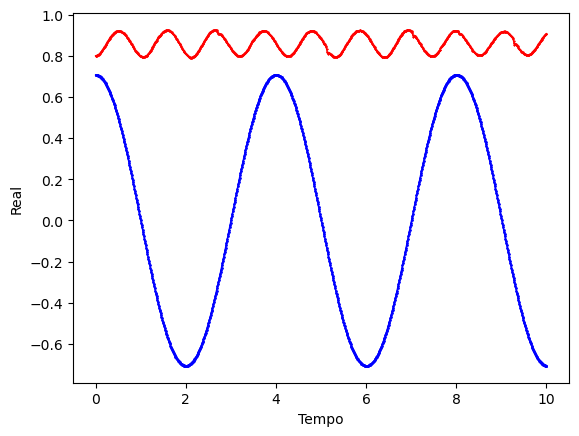

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_000.png', format='png')
plt.show()

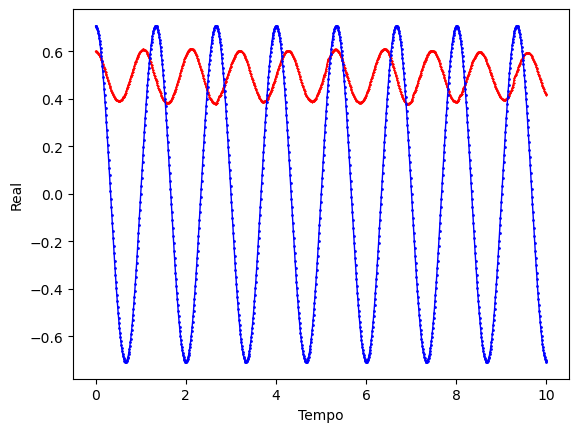

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_111.png', format='png')
plt.show()